[Reference](https://medium.com/dropout-analytics/prophet-any-stock-in-seconds-5f9479977aea)

In [1]:
pip install yfinance

     |████████████████████████████████| 5.5MB 10.6MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=034f78d955a356d3a4f7b3b5000dba1a16db3c74493e3dbc461cc0b97d1b79b6
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [2]:
import pandas as pd
import yfinance as yf
from fbprophet import Prophet

In [4]:
play = yf.Ticker('PLAY')
hist = play.history(period="max", auto_adjust=True)
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-10-10,16.653840,18.054722,15.566442,16.928139,7045100,0.0,0
2014-10-13,16.732212,17.623682,16.722415,17.143660,466900,0.0,0
2014-10-14,18.044929,18.044929,16.702824,16.937939,168000,0.0,0
2014-10-15,16.653841,17.006511,16.242393,16.849770,434900,0.0,0
2014-10-16,16.996713,17.329790,16.653840,17.124065,108500,0.0,0
...,...,...,...,...,...,...,...
2021-04-23,46.380001,46.820000,45.820000,46.750000,883400,0.0,0
2021-04-26,47.029999,47.820000,46.290001,46.540001,765200,0.0,0
2021-04-27,47.000000,47.980000,46.500000,46.990002,1116800,0.0,0


In [5]:
df = pd.DataFrame()
df['ds'] = hist.index
df['y'] = hist['Close'].values

In [6]:
m = Prophet(daily_seasonality=False)
m.fit(df)

In [7]:
future = m.make_future_dataframe(365, freq='D')
forecast = m.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
2007,2022-04-23,21.876013,10.282136,33.046788
2008,2022-04-24,21.864316,10.025060,32.796980
2009,2022-04-25,25.467039,13.628725,37.101153
2010,2022-04-26,25.438561,13.198301,37.255402
2011,2022-04-27,25.318906,13.890834,37.900594
2012,2022-04-28,25.418262,14.235514,37.242382
2013,2022-04-29,25.290931,13.033312,36.731136


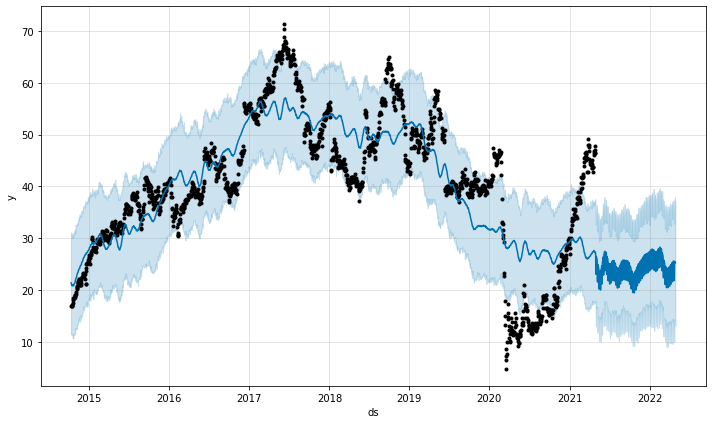

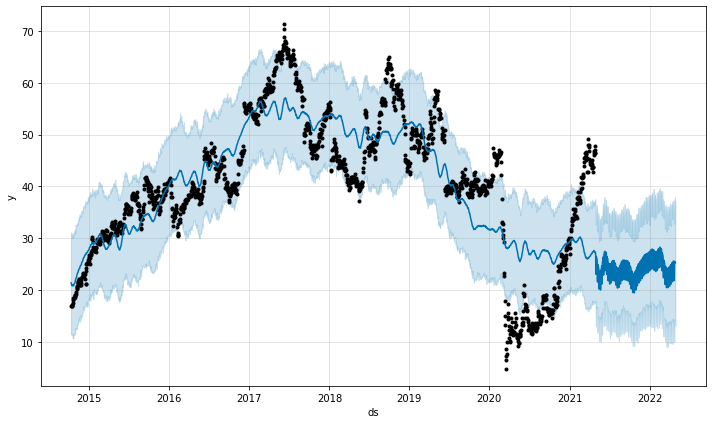

In [8]:
m.plot(forecast)